In [10]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import os
import zipfile
import shutil

## Tratamento dos dados

In [2]:
#Criar um diretório caso ele não exista
dir = 'Dados/RJ-SETOR/TEMP'
if not os.path.exists(dir):
    os.makedirs(dir)

<img src="walk.png" width=70%>

In [3]:
#Encontra o nome de todos os arquivos que estão na pasta 'files',em seguida descompacta em um diretório
filenames = []
for root, dirs, files in os.walk('Dados/RJ-SETOR/DADOS'):
    for name in files:
        zip_ref=zipfile.ZipFile('Dados/RJ-SETOR/DADOS/'+name,'r')
        zip_ref.extractall(dir)
        zip_ref.close()

## Concatenando Shapefiles

In [4]:
#Abre o shape de todos os setores e concatena
setor=pd.concat([gpd.read_file(dir+'/'+item[:-4]+'_setor.shp') for item in files], ignore_index=True)
#Deleta a pasta temporária
shutil.rmtree(dir)

In [8]:
gpd.__version__

'0.3.0'

In [9]:
print(setor.crs)
#Configurando o sistema de coordenadas
setor.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
print(setor.crs)

{'init': 'epsg:4674'}
{'init': 'epsg:4674'}


## Adicionando atributos ao shapefile

In [38]:
censo=pd.read_excel('Dados/Censo 2010/RJ/EXCEL/Basico_RJ.xls')
censo.head()

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,330010005000001,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33013,Baía da Ilha Grande,0,...,2.62,1.94,2356.80,5716056.06,2571.06,5684616.94,1565.37,4344465.56,2192.65,4711305.89
1,330010005000002,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33013,Baía da Ilha Grande,0,...,2.51,1.50,2040.47,3020377.79,2236.67,2869054.77,1816.69,20052928.88,2375.67,24942113.99
2,330010005000003,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33013,Baía da Ilha Grande,0,...,3.08,2.19,2687.80,8362007.52,2836.66,8402987.99,1593.37,7250920.66,2294.84,8835722.10
3,330010005000004,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33013,Baía da Ilha Grande,0,...,3.04,3.25,3026.67,24807309.86,3352.62,26410753.99,1865.52,10994097.59,2574.41,13362652.63
4,330010005000005,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33013,Baía da Ilha Grande,0,...,3.34,1.94,1124.82,712447.24,1229.19,649944.69,689.40,583588.50,1028.21,521878.03


In [39]:
setor=gpd.read_file('Dados/RJ-SETOR/RJ-SETOR.shp')
setor.head()

,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,NM_MUNICIP,NM_MESO,NM_MICRO,geometry
0,400341,330455705060018,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((67.60196855327882 7464.102627219262,..."
1,400342,330455705060019,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((67.56062915545877 7464.137012697503,..."
2,400343,330455705060020,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((67.54105963667529 7464.341366628712,..."
3,400344,330455705060021,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((67.72651992159972 7464.219569948145,..."
4,400347,330455705060024,URBANO,330455705003,Santo Cristo,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((68.25025455529079 7460.563391422447,..."


In [40]:
censo.dtypes.head()

Cod_setor               int64
Cod_Grandes Regiões     int64
Nome_Grande_Regiao     object
Cod_UF                 object
Nome_da_UF             object
dtype: object

In [41]:
setor.dtypes.head()

ID1            int64
CD_GEOCODI    object
TIPO          object
CD_GEOCODB    object
NM_BAIRRO     object
dtype: object

In [42]:
censo['Cod_setor']=censo['Cod_setor'].astype(str)

In [43]:
censo.dtypes.head()

Cod_setor              object
Cod_Grandes Regiões     int64
Nome_Grande_Regiao     object
Cod_UF                 object
Nome_da_UF             object
dtype: object

In [44]:
setor=pd.merge(setor,censo,left_on='CD_GEOCODI',right_on='Cod_setor',how='left')

In [45]:
setor.shape

(10504, 47)

In [46]:
setor.columns

Index(['ID1', 'CD_GEOCODI', 'TIPO', 'CD_GEOCODB', 'NM_BAIRRO', 'CD_GEOCODD',
       'NM_DISTRIT', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODM', 'NM_MUNICIP',
       'NM_MESO', 'NM_MICRO', 'geometry', 'Cod_setor', 'Cod_Grandes Regiões',
       'Nome_Grande_Regiao', 'Cod_UF', 'Nome_da_UF ', 'Cod_meso',
       'Nome_da_meso', 'Cod_micro', 'Nome_da_micro', 'Cod_RM', 'Nome_da_RM',
       'Cod_municipio', 'Nome_do_municipio', 'Cod_distrito',
       'Nome_do_distrito', 'Cod_subdistrito', 'Nome_do_subdistrito',
       'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor', 'Tipo_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012'],
      dtype='object')

In [5]:
setor.to_file('Dados/RJ-SETOR/RJ-SETOR.shp')

C:\ProgramData\Anaconda3\lib\site-packages\geopandas\io\file.py:62: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


## Juntando atributos de dois shapefiles

In [14]:
setor=gpd.read_file('Dados/RJ-SETOR/RJ-SETOR.shp')
geo_dados=gpd.read_file('Dados/RJ-DATASET/DATASET.shp')

In [15]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,Dist_Metro,Dist_Trans,Dist_Praia,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,15.665002,0.443302,1.103410,POINT (657.5137068691058 7453.832425203198)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,7.494379,3.616386,7.422906,POINT (670.5239029320986 7461.803087641325)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,0.801969,0.668178,6.303847,POINT (674.3450038415888 7469.439743130414)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,10.743404,0.488183,3.357297,POINT (662.7013782087697 7457.284070512794)
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,17.173722,0.276796,1.318215,POINT (656.0187146395718 7453.574299351502)


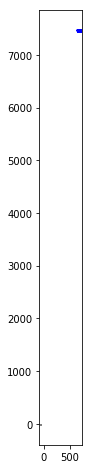

In [16]:
base=setor.plot(color='white',edgecolor='gray',figsize=(15,8))
geo_dados.plot(ax=base,color='blue',markersize=1)